Load the data as a Pandas data frame and ensure that it imported correctly.


In [233]:
import pandas as pd

In [234]:
# Read Data
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Begin by prepping the data for modeling:


Remove the car name column.

In [236]:
# Look at name of columns
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [237]:
# Remove column
data = data.drop(columns="car name")

In [238]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [239]:
# Display data types
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [241]:
# Changes horsepower to numeric and converts errors to NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [243]:
# Removes any NaN
data = data.dropna(axis= 0, how='any')

In [244]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Create dummy variables for the origin column.

In [245]:
# Creates dummies for origin column
dummy_origin = pd.get_dummies(data["origin"])

In [246]:
dummy_origin

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [247]:
# Creates correlation matrix
corr_matrix = data.corr()

In [248]:
import seaborn as sns

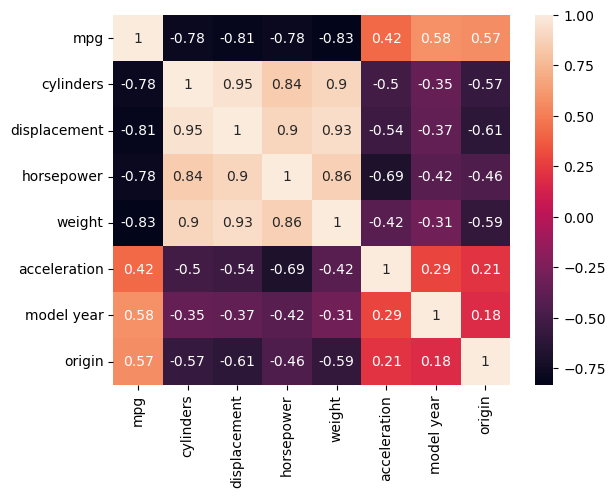

In [249]:
# Diplays correlation matrix
cm_plot = sns.heatmap(corr_matrix, annot=True)

The image above created from the correlation matrix of the Auto Data, shows us that MPG is highly correlated with the following features: Displacement and Weight. 

Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

In [250]:
# Import Necessary Libraries
import matplotlib as plot

In [251]:
# Converts weight to numeric to avoid errors
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

<AxesSubplot:xlabel='mpg', ylabel='weight'>

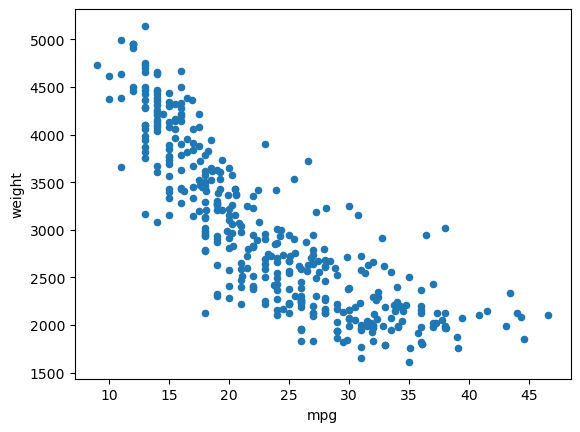

In [252]:
# Creates scatter plot of age versus weight 
data.plot.scatter(x = 'mpg', y = 'weight')

MPG versus weight has a correlation coefficient of - 0.83. Since this is so close to - 1, it indicates that there is a negative correlation between the two. As weight goes down, MPG goes up. The scatter plot shows this as the points are in a negative slope as MPG increases

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
# Separate the target from the features
feature = data.drop('mpg', axis=1)
target = data['mpg']

#Split the data into 80% training and 20% test
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

Train an ordinary linear regression on the training data.

In [255]:
# Import necessary Libraries
from sklearn.linear_model import LinearRegression

In [256]:
# Create Linear Regression Model
regression = LinearRegression()

In [257]:
# Drops any NaN to avoid errors
data = data.dropna(axis= 0, how='any')

In [258]:
# Creates model
model = regression.fit(feature_train, target_train)

Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [259]:
# R2 for train data 
regression.score(feature_train, target_train)

0.826001578671067

In [260]:
# R2 for test data
# R2 for train data 
regression.score(feature_test, target_test)

0.7901500386760352

In [261]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

In [262]:
model.fit(feature_test,target_test)

LinearRegression()

In [263]:
# Creates preditions of test features
y_pred_test = model.predict(feature_test)

In [264]:
# RMSE of test
rmse_test = mean_squared_error(target_test, y_pred_test)**0.5
rmse_test

2.9816057261316895

In [265]:
model.fit(feature_train,target_train)

LinearRegression()

In [266]:
# Creates predictions of training features
y_pred_train = model.predict(feature_train)

In [267]:
# RSEM of train
rmse_train = mean_squared_error(target_train, y_pred_train)**0.5
rmse_train

3.3134960151437447

In [268]:
# Import necessary Libraries
from sklearn.metrics import mean_absolute_error as mae

In [269]:
# MAE of Test
print("MAE Test:", mae(target_test,y_pred_test))

MAE Test: 2.1864311671060714


In [270]:
# MAE of Train
print("MAE Train:", mae(target_train,y_pred_train))

MAE Train: 2.548168196215135


Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [271]:
# Import necessary Libraries
from sklearn.linear_model import Ridge

In [272]:
# Create Ridge Regression
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(feature_train,target_train)

Ridge(alpha=10)

In [273]:
# Runs ridge regression 
train_score_ridge = ridgeReg.score(feature_train, target_train)
test_score_ridge = ridgeReg.score(feature_test, target_test)

In [274]:
print("The train score for ridge model is {}".format(train_score_ridge))

print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.8258936780257804
The test score for ridge model is 0.7915211170468783
